# Transformada de Fourier de Tempo Discreto - DTFT

A DTFT difere da transformada de Fourier ao aplicar-se a funções cuja variável independente é discreta (descontínua), e não contínua, como é o caso da transformada de Fourier. A DTFT não deve ser confundida com a transformada discreta de Fourier (DFT), que pode ser considerada como um seu caso especial, que aparece numa situação muito comum: quando a função original é periódica.

## Definição

Dado um conjunto discreto de números reais ou complexos: ${\displaystyle x[n],\;n\in \mathbb {Z} }$ (inteiros), a transformada de Fourier de tempo discreto de ${\displaystyle x[n]\,}$ é usualmente escrita:

$${\displaystyle X(\omega )=\sum _{n=-\infty }^{\infty }x[n]\,e^{-i\omega n}}$$

## EXEMPLO 01 - Visualizando um Sinal Constante Discreto:

Temos a seguinte situação:

$$ x[n] = cont.$$

Neste caso, a constante será igual a 1

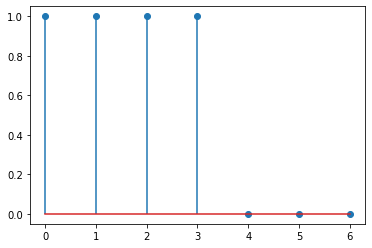

In [28]:
# Exemplo 01 - Sinal Constante Discreto :

import numpy as np
import matplotlib.pyplot as plt

# Criando um array no eixo n de inteiros:
n = np.array([0, 1, 2, 3, 4, 5, 6])

# Criando um array no eixo y - sinal contínuo:
y = np.array([1, 1, 1, 1, 0, 0, 0])

# Plotando o sinal o sinal:
plt.stem(n, y)

# Visualizando as imagens:
plt.show()

Pela Definicao da Transformada de Fourier de Tempo Discreta, a DTFT é uma transformada de Fourier que pode ser aplicada a qualquer função discreta. (OBS: Soma de uma Progressão Geométrica Finita)

$${\displaystyle \begin{align*} X(\omega ) &= \sum _{n=0}^{3}x[n] e^{-i\omega n} \\  \, &= \frac{1-e^{-i 4 \omega}}{1 - e^{-i\omega}} \\ \, &= e^{\frac{-i3 \omega}{2}} \frac{\sin(2 \omega)}{\sin(\omega/2)} \end{align*}}$$

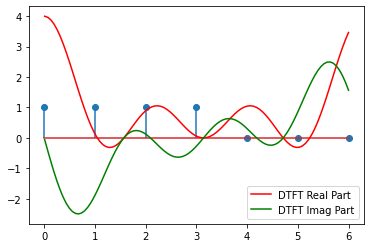

In [29]:
# Exemplo 01 - Sinal Contínuo Discreto:

import numpy as np
import matplotlib.pyplot as plt


n = np.array([0, 1, 2, 3, 4, 5, 6])              # Criando um array no eixo n de inteiros
w = np.linspace(0.01, 6, 100)                    # Criando um espaço na frequeência:
y = np.array([1, 1, 1, 1, 0, 0, 0])              # Criando um array no eixo y - sinal contínuo:
dtft = (1 - np.e**(-1j*w*4))/(1 - np.e**(-1j*w)) # Criando a visualização da DTFT:

# Plotando o sinal o sinal:
plt.stem(n, y)
plt.plot(w, dtft.real, label='DTFT Real Part', color='red')
plt.plot(w, dtft.imag, label='DTFT Imag Part', color='green')

# Colocando Legendas
plt.legend()

# Visualizando as imagens:
plt.show()

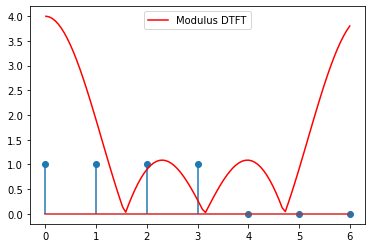

In [30]:
# Exemplo 01 - Sinal Contínuo Discreto:

import numpy as np
import matplotlib.pyplot as plt


n = np.array([0, 1, 2, 3, 4, 5, 6])              # Criando um array no eixo n de inteiros
w = np.linspace(0.01, 6, 100)                    # Criando um espaço na frequeência:
y = np.array([1, 1, 1, 1, 0, 0, 0])              # Criando um array no eixo y - sinal contínuo:
dtft = (1 - np.e**(-1j*w*4))/(1 - np.e**(-1j*w)) # Criando a visualização da DTFT:

# Plotando o sinal o sinal:
plt.stem(n, y)
plt.plot(w, abs(dtft), label='Modulus DTFT', color='red')

# Colocando Legendas
plt.legend()

# Visualizando as imagens:
plt.show()

### Outra forma de VISUALIZAR o sinal - usando Python

Como sabemos, a DTFT se repte no espaço de frequências com um período de $2 \cdot \pi$. Deste modo, podemos criar uma forma de representar o sinal na frequência:

* OBS1: Esse método não é o mais eficiente, pois a DTFT é um processo de multiplicativo - onde entra valores discretos e saem funções contínuas.

* OBS2: Esse método é custoso do ponto de vista de computação, pois é necessário calcular a DTFT para cada valor de $n * [w_1, w_2, ..., w_n]$.

* OBS3: Esse método não preserva a escala na frequências.


In [31]:
import numpy as np

def DTFT(signal_array, freq_space):
    """
    Calcula a Transformada de Fourier de um sinal Discreto no Tempo.
    :param signal_array: Um array contendo todos os valores discretos do sinal.
    :param freq_space: Um array contendo os valores da frequência (Geralmente de 0 a 2*pi)
    """
    soma = 0                                                    # Criando variável soma.
    dtft_list = []                                              # Criando variável lista.
    for n, sinal_discreto in enumerate(signal_array):           # Laço for - para cada valor, um índice.
        soma += sinal_discreto * np.e ** (-1j * freq_space * n) # Cálculo da dtft para cada valor.
        dtft_list.append(soma)                                  # Adiciona DTFT na lista.
    dtft = [sum(elementos) for elementos in zip(*dtft_list)]    # Somando cada parcela de valor na freq.
    return np.array(dtft)

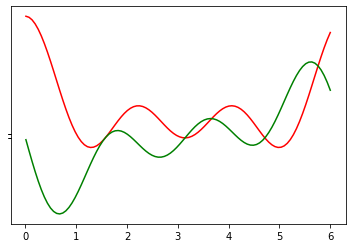

In [37]:
import numpy as np
import matplotlib.pyplot as plt

n = np.array([0, 1, 2, 3, 4, 5, 6])    # Criando um array no eixo n de inteiros
w = np.linspace(0.01, 6, 100)          # Criando um espaço na frequeência:
y = np.array([1, 1, 1, 1, 0, 0, 0])    # Criando um array no eixo y - sinal contínuo:
teste_funcao = DTFT(y, w)              # Testando a função definida acima

# Plotando a função:
plt.plot(w, teste_funcao.real, label='DTFT Real Part', color='red')
plt.plot(w, teste_funcao.imag, label='DTFT Imag Part', color='green')

# Visualizando as Imagens:
plt.yticks(y, labels="")               # Removendo a escala do eixo y
plt.show()

#  EXEMPLO 02 - Visualizando um Sinal Senoidal/Cossenoidal Discreto:

Temos a seguinte situação:

$$ x[n] = A \sin(\omega n + \psi)$$

Neste caso, a frequência da onda será igual a 4 Hz, a fase será igual a 0 e a amplitude será igual a 5.

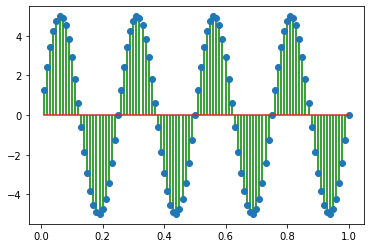

In [33]:
import numpy as np
import matplotlib.pyplot as plt

aplt = 5                             # Amplitude de Onda
freq = 4                             # Frequência (Hz)
psi = 0                              # Fase do sinal
w = 2*np.pi*freq                     # Velocidade angular (rad/s)
t = np.linspace(0.01, 1, 100)        # Definindo um array de tempo (s)
sin_signal = aplt*np.sin(w*t + psi)  # Sinal de onda - Seno

# Visualizando Amostragem no tempo:
plt.stem(t, sin_signal, 'green')       # Plotando seno - verde
plt.show()

Pela definição da formula de Euler, podemos vericar que o cosseno possui a seguinte forma:

$$ x[n] = 5 \sin(4n) = \frac{5}{2i}(e^{i4n} - e^{-i4n})$$

Com isso, podemos aplicar a definição de DTFT:

$$\displaystyle \begin{align*} X(\omega ) &= \sum _{n=-\infty}^{\infty}x[n] e^{-i\omega n} \\ \, & = \sum _{n=-\infty}^{\infty} \left(\frac{5}{2i}(e^{i4n} - e^{-i4n}) \right) e^{-i\omega n} \\ \, & = \sum _{n=-\infty}^{\infty} \left(\frac{5}{2i}(e^{-in(\omega - 4)} - e^{-in (\omega + 4)}) \right) \\ \, &= \frac{5}{2i} \left[ \sum _{n=-\infty}^{\infty} e^{-in(\omega - 4)} - \sum _{n=-\infty}^{\infty} e^{-in(\omega + 4)}\right] \end{align*}$$

Pela propriedade: 

$$ \sum _{n=-\infty}^{\infty} e^{-in \Omega} = 2 \pi \delta (\Omega)$$

Temos:

$$\displaystyle \begin{align*} X(\omega ) &= \frac{5}{2i} \left[ 2\pi \delta(\omega - 4)   - 2\pi \delta(\omega + 4) \right] \\ \, &= 5 i \pi \left[ \delta(\omega + 4) - \delta(\omega - 4) \right] \end{align*}$$

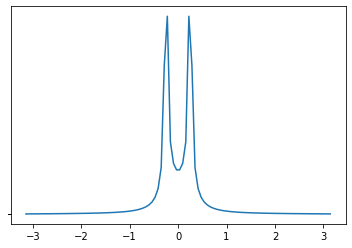

In [34]:
w = np.linspace(-np.pi, np.pi, 100)   # Criando um espaço na frequência:
sinal = DTFT(sin_signal, w)

#plt.plot(w, sinal.real)
#plt.plot(w, sinal.imag)
plt.plot(w, abs(sinal))
plt.yticks(y, labels="")
plt.show()